# KNearestNeighbor Regression

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, PowerTransformer
from sklearn.pipeline import Pipeline
from scipy.stats import iqr
from sklearn.feature_selection import SelectKBest, f_regression

In [2]:
df = pd.read_csv("../datasets/Life Expectancy Data.csv")
df.columns = df.columns.str.strip()

In [3]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


##### NUll Values

In [4]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

**SimpleImpuer**

In [5]:
data = df.select_dtypes("number")

In [6]:
simple_imputer = SimpleImputer()

In [7]:
df_simple_imputed = simple_imputer.set_output(transform="pandas").fit_transform(data)

In [8]:
df_simple_imputed.isna().sum()

Year                               0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

In [9]:
# data_x and data_y split
data_x = df_simple_imputed.drop(columns="Life expectancy")
data_y = df_simple_imputed["Life expectancy"]

In [10]:
model_knn = KNeighborsRegressor()
model_knn.fit(data_x, data_y)

KNeighborsRegressor()

In [11]:
cross_val_score(model_knn, data_x, data_y, scoring='r2', cv=5, verbose=3)

[CV] END ................................ score: (test=0.119) total time=   0.1s
[CV] END ............................... score: (test=-0.168) total time=   0.0s
[CV] END ............................... score: (test=-0.048) total time=   0.0s
[CV] END ................................ score: (test=0.010) total time=   0.0s
[CV] END ............................... score: (test=-0.018) total time=   0.0s


array([ 0.11933193, -0.16797199, -0.0482762 ,  0.01005066, -0.01779058])

In [12]:
scalers = {
    "StandardScaler": StandardScaler,
    "MinMaxScaler":MinMaxScaler,
    "MaxAbsScaler": MaxAbsScaler,
    "PowerTransformer":PowerTransformer
}

results = []

for name, scaler in scalers.items():

    scaled_data = scaler().fit_transform(data_x)
    knn = KNeighborsRegressor()
    score = cross_val_score(knn, scaled_data, data_y, cv=5, verbose=3, scoring="r2")
    print(f"Scaler: {name} \t score_mean: {score.mean()} \t score_std:{score.std()}", end="\n\n")
    results.append({"Scaler":name, "score_mean":score.mean(), "score_std":score.std()})


[CV] END ................................ score: (test=0.781) total time=   0.0s
[CV] END ................................ score: (test=0.852) total time=   0.0s
[CV] END ................................ score: (test=0.753) total time=   0.0s
[CV] END ................................ score: (test=0.771) total time=   0.0s
[CV] END ................................ score: (test=0.836) total time=   0.0s
Scaler: StandardScaler 	 score_mean: 0.7982895343997172 	 score_std:0.038410923518381594

[CV] END ................................ score: (test=0.810) total time=   0.0s
[CV] END ................................ score: (test=0.839) total time=   0.0s
[CV] END ................................ score: (test=0.788) total time=   0.0s
[CV] END ................................ score: (test=0.787) total time=   0.0s
[CV] END ................................ score: (test=0.810) total time=   0.0s
Scaler: MinMaxScaler 	 score_mean: 0.8066885169315796 	 score_std:0.018868425115837105

[CV] END ...

In [13]:
pd.DataFrame(results)

,Scaler,score_mean,score_std
0,StandardScaler,0.798290,0.038411
1,MinMaxScaler,0.806689,0.018868
2,MaxAbsScaler,0.819788,0.022115
3,PowerTransformer,0.823613,0.028324


#### HyperParameter Tuneing

In [35]:
pipe = Pipeline([
    ("Scaler", PowerTransformer()),
    ("model", KNeighborsRegressor())
])

grid = RandomizedSearchCV(pipe, {
    "model__n_neighbors": range(5,30,2),
    "model__weights": ["uniform","distance"],
    "model__leaf_size": range(5,50,5),
    "model__p": [1,2,3,4,5]
}, scoring="r2", cv=5, n_jobs=6, verbose=3, n_iter=int(1000/5))

In [36]:
grid.fit(data_x, data_y)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('Scaler', PowerTransformer()),
                                             ('model', KNeighborsRegressor())]),
                   n_iter=200, n_jobs=6,
                   param_distributions={'model__leaf_size': range(5, 50, 5),
                                        'model__n_neighbors': range(5, 30, 2),
                                        'model__p': [1, 2, 3, 4, 5],
                                        'model__weights': ['uniform',
                                                           'distance']},
                   scoring='r2', verbose=3)

In [37]:
grid.best_estimator_

Pipeline(steps=[('Scaler', PowerTransformer()),
                ('model',
                 KNeighborsRegressor(leaf_size=25, n_neighbors=23, p=1,
                                     weights='distance'))])

In [14]:
grid.best_score_

NameError: name 'grid' is not defined

In [ ]:
grid.best_params_

In [14]:
data_x.head()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015.0,263.0,62.0,0.01,71.279624,65.0,1154.0,19.1,83.0,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014.0,271.0,64.0,0.01,73.523582,62.0,492.0,18.6,86.0,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013.0,268.0,66.0,0.01,73.219243,64.0,430.0,18.1,89.0,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012.0,272.0,69.0,0.01,78.184215,67.0,2787.0,17.6,93.0,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011.0,275.0,71.0,0.01,7.097109,68.0,3013.0,17.2,97.0,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [16]:
data_x.index

RangeIndex(start=0, stop=2938, step=1)

In [17]:
data_x.drop(columns=["GDP","Population","Year","Alcohol", "Total expenditure","thinness 5-9 years"])

,Adult Mortality,infant deaths,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,thinness 1-19 years,Income composition of resources,Schooling
0,263.0,62.0,71.279624,65.0,1154.0,19.1,83.0,6.0,65.0,0.1,17.2,0.479,10.1
1,271.0,64.0,73.523582,62.0,492.0,18.6,86.0,58.0,62.0,0.1,17.5,0.476,10.0
2,268.0,66.0,73.219243,64.0,430.0,18.1,89.0,62.0,64.0,0.1,17.7,0.470,9.9
3,272.0,69.0,78.184215,67.0,2787.0,17.6,93.0,67.0,67.0,0.1,17.9,0.463,9.8
4,275.0,71.0,7.097109,68.0,3013.0,17.2,97.0,68.0,68.0,0.1,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,723.0,27.0,0.000000,68.0,31.0,27.1,42.0,67.0,65.0,33.6,9.4,0.407,9.2
2934,715.0,26.0,0.000000,7.0,998.0,26.7,41.0,7.0,68.0,36.7,9.8,0.418,9.5
2935,73.0,25.0,0.000000,73.0,304.0,26.3,40.0,73.0,71.0,39.8,1.2,0.427,10.0
2936,686.0,25.0,0.000000,76.0,529.0,25.9,39.0,76.0,75.0,42.1,1.6,0.427,9.8


In [18]:
data_xx = data_x.drop(columns=["GDP","Population","Year","Alcohol", "Total expenditure","thinness 5-9 years",
                              "under-five deaths", "Measles", "Hepatitis B"])

pipe = Pipeline([
    ("Scaler", PowerTransformer()),
    ("model", KNeighborsRegressor(leaf_size=30, n_neighbors=23, p=1, weights='distance'))
])

score = cross_val_score(pipe, data_xx, data_y, cv=5, scoring='r2')
print("score_mean: ", score.mean())
print("score_std: ", score.std())

score_mean:  0.8777973853083957
score_std:  0.018973485024153677


#### Exploring the heatmap for correlation

<Axes: >

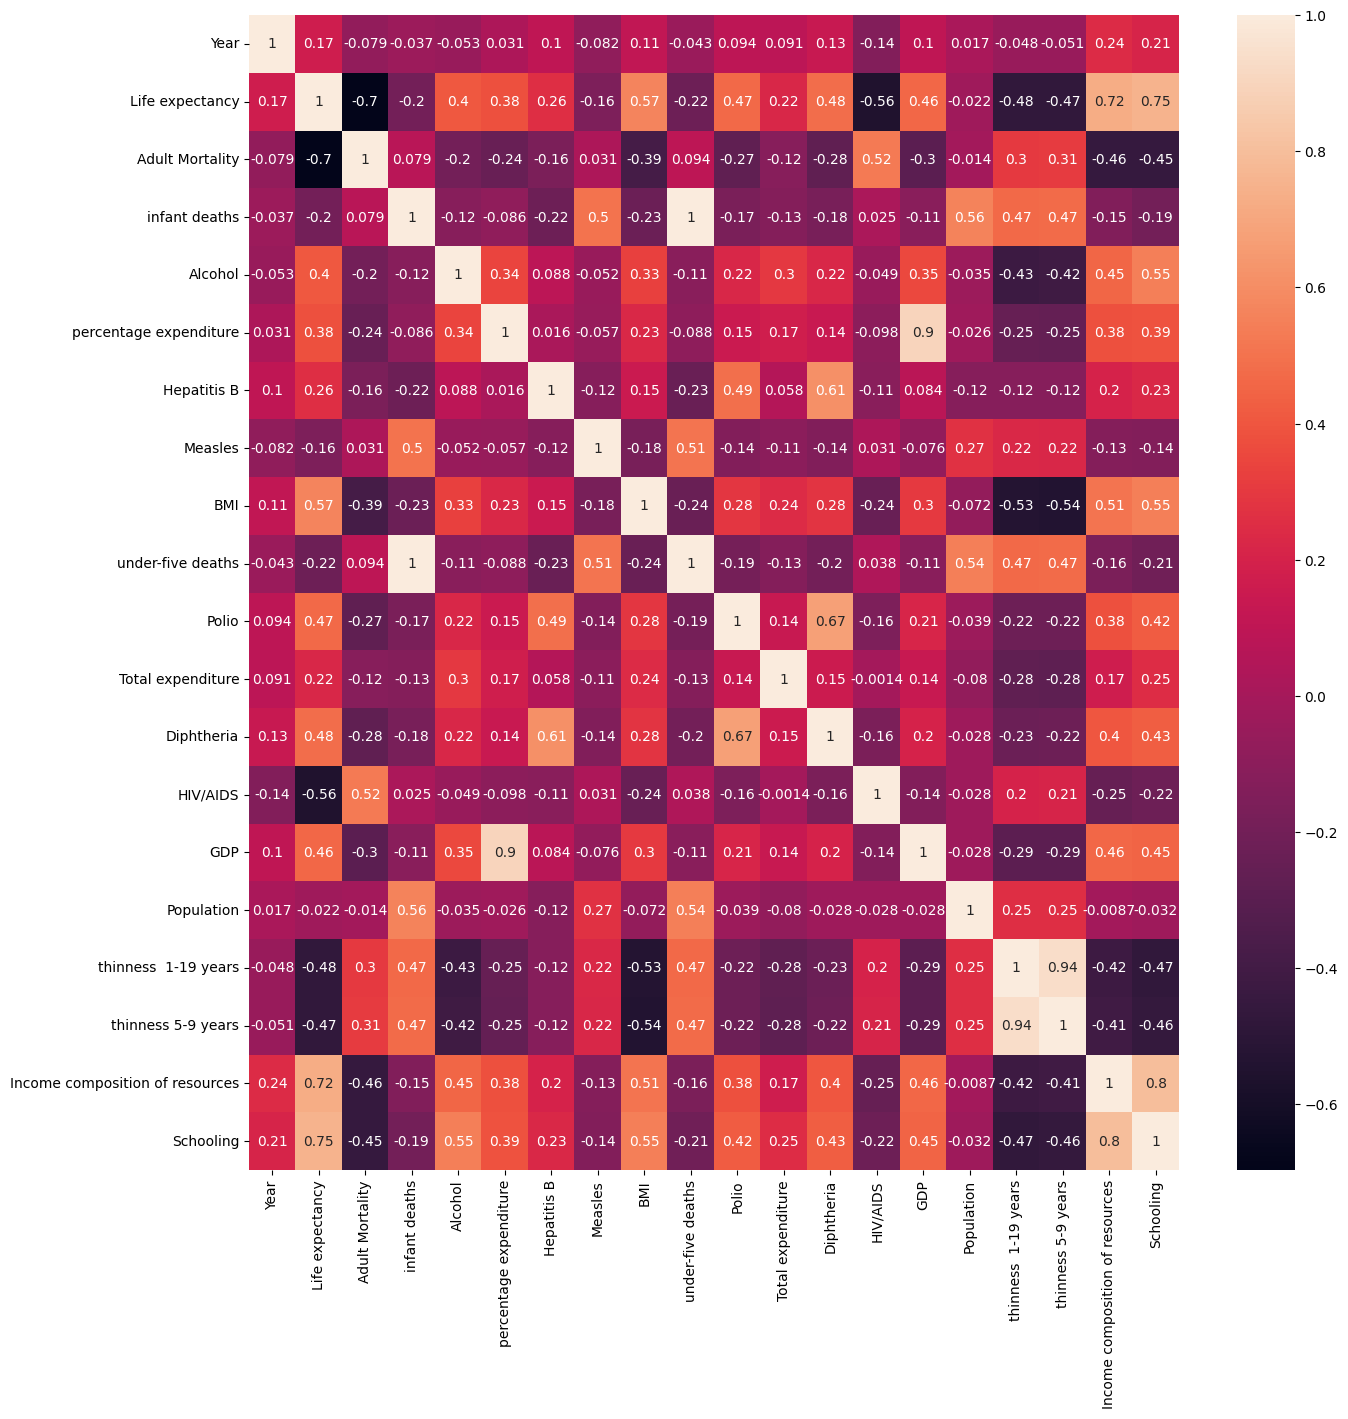

In [19]:
fig, ax = plt.subplots(figsize=(15,15))

sns.heatmap(df.select_dtypes("number").corr(), annot=True)

#### Obererving nan and outlier on new filtered data

In [20]:
drop_columns =["GDP","Population","Year","Alcohol", "Total expenditure","thinness 5-9 years",
                              "under-five deaths", "Measles", "Hepatitis B"]
new_df = df.drop(columns=drop_columns)

In [21]:
new_df.isna().sum()

Country                              0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
percentage expenditure               0
BMI                                 34
Polio                               19
Diphtheria                          19
HIV/AIDS                             0
thinness  1-19 years                34
Income composition of resources    167
Schooling                          163
dtype: int64

In [22]:
country_group = new_df.groupby("Country")

In [23]:
countries_items_counts =   country_group.apply(lambda cdf: len(cdf)) 

In [24]:
remove_countreis_names =  countries_items_counts[countries_items_counts<16].index
remove_countreis_names

Index(['Cook Islands', 'Dominica', 'Marshall Islands', 'Monaco', 'Nauru',
       'Niue', 'Palau', 'Saint Kitts and Nevis', 'San Marino', 'Tuvalu'],
      dtype='object', name='Country')

In [25]:
new_df2 =  new_df.set_index("Country").drop(index=remove_countreis_names)
new_df2

,Status,Life expectancy,Adult Mortality,infant deaths,percentage expenditure,BMI,Polio,Diphtheria,HIV/AIDS,thinness 1-19 years,Income composition of resources,Schooling
Country,,,,,,,,,,,,
Afghanistan,Developing,65.0,263.0,62,71.279624,19.1,6.0,65.0,0.1,17.2,0.479,10.1
Afghanistan,Developing,59.9,271.0,64,73.523582,18.6,58.0,62.0,0.1,17.5,0.476,10.0
Afghanistan,Developing,59.9,268.0,66,73.219243,18.1,62.0,64.0,0.1,17.7,0.470,9.9
Afghanistan,Developing,59.5,272.0,69,78.184215,17.6,67.0,67.0,0.1,17.9,0.463,9.8
Afghanistan,Developing,59.2,275.0,71,7.097109,17.2,68.0,68.0,0.1,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...
Zimbabwe,Developing,44.3,723.0,27,0.000000,27.1,67.0,65.0,33.6,9.4,0.407,9.2
Zimbabwe,Developing,44.5,715.0,26,0.000000,26.7,7.0,68.0,36.7,9.8,0.418,9.5
Zimbabwe,Developing,44.8,73.0,25,0.000000,26.3,73.0,71.0,39.8,1.2,0.427,10.0


In [26]:
df.shape

(2938, 22)

**Applying the KNN Imputer**

In [50]:
data_x = new_df2.drop(columns=["Life expectancy", "Status"])
data_y = new_df2["Life expectancy"]

pipe = Pipeline([
    ("imputer", KNNImputer()),
    ("Scaler", PowerTransformer()),
    ("model", KNeighborsRegressor(leaf_size=30, n_neighbors=23, p=1, weights='distance'))
])

grid = GridSearchCV(pipe, {
    "imputer__n_neighbors": range(5,30,2),
    "model__n_neighbors": range(20,30,3),
    # "model__weights": ["uniform","distance"],
    "model__leaf_size": range(29,32),
    # "model__p": [1,2,3,4,5]
}, scoring="r2", cv=5, n_jobs=6, verbose=3)

In [51]:
grid.fit(data_x, data_y)

Fitting 5 folds for each of 156 candidates, totalling 780 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer', KNNImputer()),
                                       ('Scaler', PowerTransformer()),
                                       ('model',
                                        KNeighborsRegressor(n_neighbors=23, p=1,
                                                            weights='distance'))]),
             n_jobs=6,
             param_grid={'imputer__n_neighbors': range(5, 30, 2),
                         'model__leaf_size': range(29, 32),
                         'model__n_neighbors': range(20, 30, 3)},
             scoring='r2', verbose=3)

In [52]:
grid.best_estimator_

Pipeline(steps=[('imputer', KNNImputer(n_neighbors=7)),
                ('Scaler', PowerTransformer()),
                ('model',
                 KNeighborsRegressor(leaf_size=29, n_neighbors=20, p=1,
                                     weights='distance'))])

In [53]:
grid.best_params_

{'imputer__n_neighbors': 7, 'model__leaf_size': 29, 'model__n_neighbors': 20}

In [54]:
grid.best_score_

0.8855761479916717

##### Capping the  data according to the Country Group and Whole data

In [32]:
def cap_data(series):

    iqr_ = iqr(series)
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)

    lb = q1 - 0.8*iqr_
    ub = q3 + 0.8*iqr_

    return np.where(series < lb, lb, np.where(series > ub, ub, series))

def cap_df_data(df):
    return df.select_dtypes("number").apply(lambda x: cap_data(x))
    

def capping_country(df):
    countries_group = df.groupby("Country")
    return countries_group.apply(lambda cdf: cap_df_data(cdf))
    

In [34]:
new_df3 =  capping_country(new_df2.reset_index())

In [35]:
data_x = new_df3.drop(columns=["Life expectancy",])
data_y = new_df3["Life expectancy"]

pipe = Pipeline([
    ("imputer", KNNImputer()),
    ("Scaler", PowerTransformer()),
    ("model", KNeighborsRegressor(leaf_size=30, n_neighbors=23, p=1, weights='distance'))
])

grid = GridSearchCV(pipe, {
    "imputer__n_neighbors": range(5,30,2),
    "model__n_neighbors": range(20,30,3),
    # "model__weights": ["uniform","distance"],
    "model__leaf_size": range(29,32),
    # "model__p": [1,2,3,4,5]
}, scoring="r2", cv=5, n_jobs=6, verbose=3)

In [36]:
grid.fit(data_x, data_y)

Fitting 5 folds for each of 156 candidates, totalling 780 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer', KNNImputer()),
                                       ('Scaler', PowerTransformer()),
                                       ('model',
                                        KNeighborsRegressor(n_neighbors=23, p=1,
                                                            weights='distance'))]),
             n_jobs=6,
             param_grid={'imputer__n_neighbors': range(5, 30, 2),
                         'model__leaf_size': range(29, 32),
                         'model__n_neighbors': range(20, 30, 3)},
             scoring='r2', verbose=3)

In [37]:
grid.best_score_

0.8979337185794567

In [66]:
data_x = new_df3.drop(columns=["Life expectancy",])
data_y = new_df3["Life expectancy"]

pipe = Pipeline([
    ("imputer", KNNImputer()),
    ("Scaler", PowerTransformer()),
    ("k_best", SelectKBest(f_regression,k=4)),
    ("model", KNeighborsRegressor(leaf_size=30, n_neighbors=23, p=1, weights='uniform'))
])

grid = GridSearchCV(pipe, {
    "k_best__k": [5,6],
    "imputer__n_neighbors": range(5,30,2),
    "model__n_neighbors": range(20,30,3),
    # "model__weights": ["uniform","distance"],
    "model__leaf_size": range(29,32),
    # "model__p": [1,2,3,4,5]
}, scoring="r2", cv=5, n_jobs=6, verbose=3)

In [67]:
grid.fit(data_x, data_y)

Fitting 5 folds for each of 312 candidates, totalling 1560 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer', KNNImputer()),
                                       ('Scaler', PowerTransformer()),
                                       ('k_best',
                                        SelectKBest(k=4,
                                                    score_func=<function f_regression at 0x0000024207C8F010>)),
                                       ('model',
                                        KNeighborsRegressor(n_neighbors=23,
                                                            p=1))]),
             n_jobs=6,
             param_grid={'imputer__n_neighbors': range(5, 30, 2),
                         'k_best__k': [5, 6], 'model__leaf_size': range(29, 32),
                         'model__n_neighbors': range(20, 30, 3)},
             scoring='r2', verbose=3)

In [68]:
grid.best_estimator_

Pipeline(steps=[('imputer', KNNImputer(n_neighbors=25)),
                ('Scaler', PowerTransformer()),
                ('k_best',
                 SelectKBest(k=5,
                             score_func=<function f_regression at 0x0000024207C8F010>)),
                ('model',
                 KNeighborsRegressor(leaf_size=29, n_neighbors=26, p=1))])

In [69]:
grid.best_score_

0.9098559128077135